# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [8]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [9]:
import numpy as np
from datetime import datetime, timedelta

from netCDF4 import Dataset

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

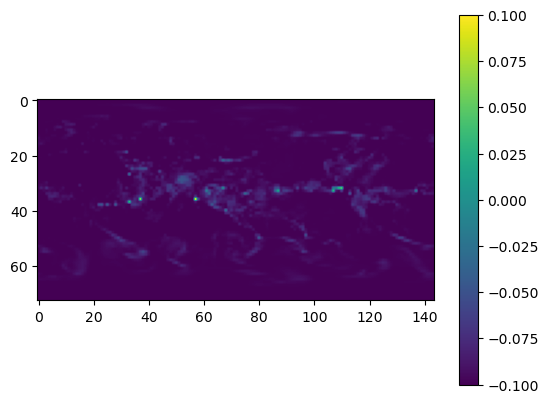

In [10]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:] #hours since 1900-01-01 00:00:0.

start_time = datetime(1900,1,1,0,0)
dts = np.empty(len(time),dtype=datetime)
for index, t in enumerate(time):
    dts[index] = start_time + timedelta(hours=int(t))

tp = data.variables['tp'][:]
p10u = data.variables['p10u'][:]
p10v = data.variables['p10v'][:]
msl = data.variables['msl'][:]*1000

plt.imshow(tp[1])
plt.imshow(msl[1])
plt.colorbar()


/home/devyn.kimball/miniconda3/envs/atsc270/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'colord'
  result = super().contour(*args, **kwargs)


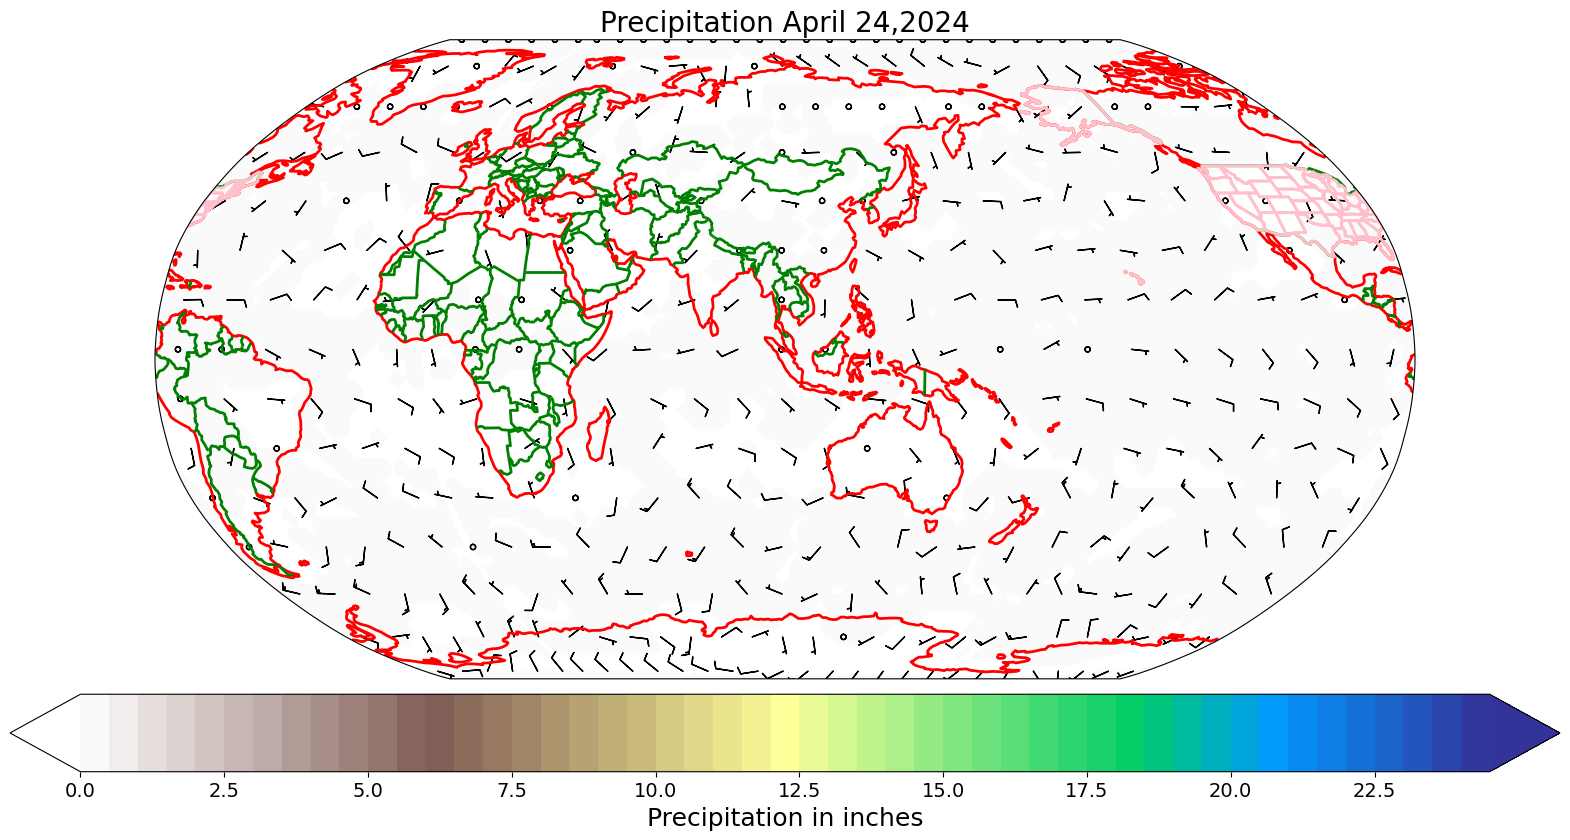

In [22]:
proj=ccrs.Robinson(central_longitude=101)

fig = plt.figure(figsize=(20,10),dpi=100)
ax = plt.axes(projection = proj)

clevs = np.arange(960,1100,4)
cs = plt.contour(lon,lat,msl[0],clevs,colord='k',transform = ccrs.PlateCarree())
ax.clabel(cs,inline=True)
cs = plt.contourf(lon,lat,tp[1],cmap = 'terrain_r',transform = ccrs.PlateCarree(),levels=np.arange(0,25,0.5),extend='both')
#nan_ind = where(tp<2)
#print(nan_ind)
#tp(nan_ind) = np.nan
#axl = plt.pcolormesh(lon,lat,tp[1],transform = proj,

cb=plt.colorbar(orientation='horizontal',pad=0.02)
cb.set_label('Precipitation in inches',fontsize=18)
cb.ax.tick_params(labelsize=14)
plt.barbs(lon[::5],lat[::5],p10u[0,::5,::5],p10v[0,::5,::5],transform = ccrs.PlateCarree(),length=5)

ax.coastlines(linewidth=2,color='red')
ax.add_feature(cfeature.BORDERS,edgecolor='green',linewidth=2)
ax.add_feature(cfeature.STATES,edgecolor='pink',linewidth=2)

#save plt.
t = plt.title('Precipitation April 24,2024', fontsize=20)